In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [51]:
print(os.listdir())

['.ipynb_checkpoints', 'cleaning.ipynb', 'mpro.ipynb']


In [52]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [53]:
df = pd.read_excel('C:\\Users\\Shruti Mishra\\Downloads\\mprod.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [54]:
df.shape


(1009, 7)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [56]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [57]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

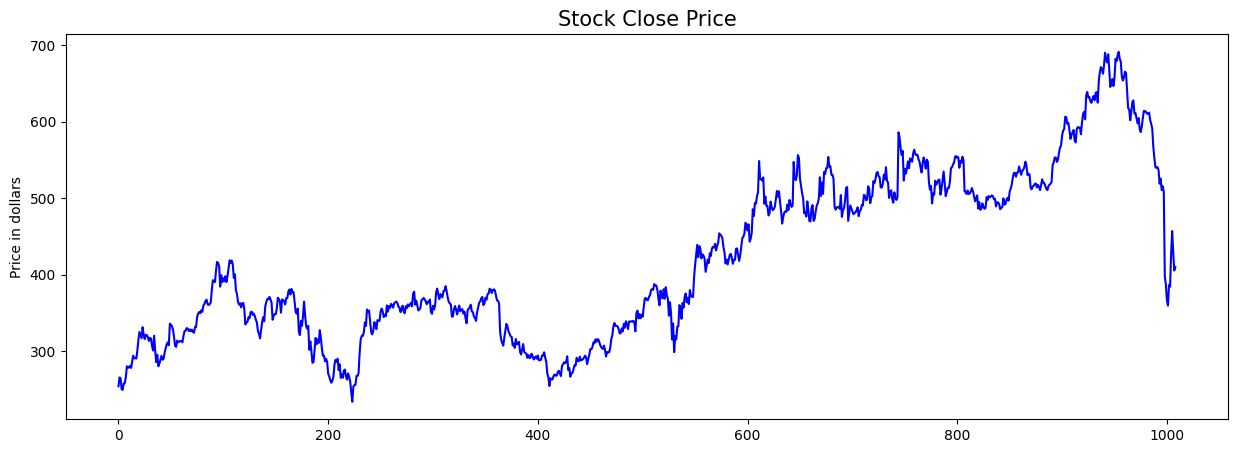

In [59]:
#plot close price
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color="blue")
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

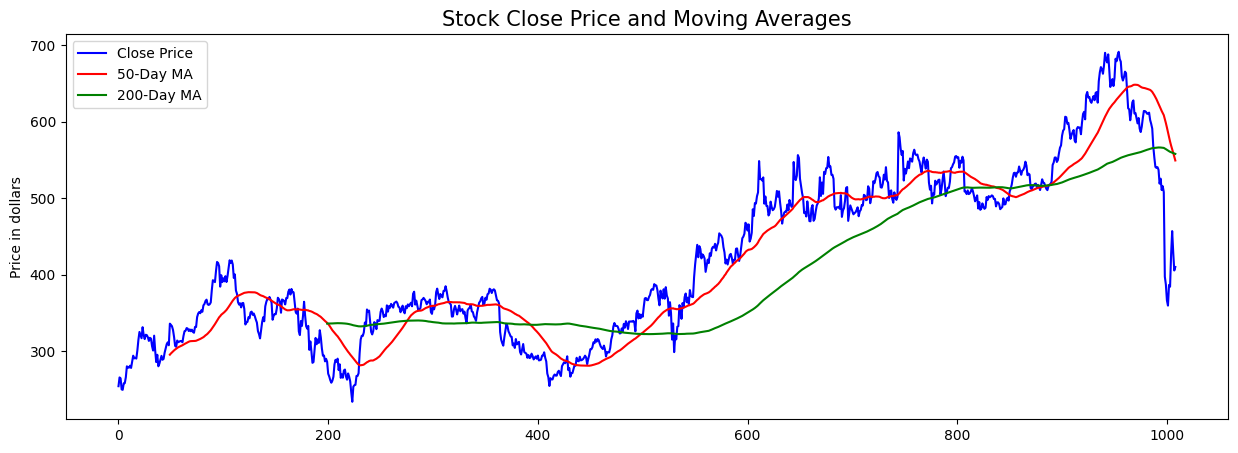

In [60]:
# Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(15,5))
plt.plot(df['Close'], color="blue", label='Close Price')
plt.plot(df['MA50'], color="red", label='50-Day MA')
plt.plot(df['MA200'], color="green", label='200-Day MA')
plt.title('Stock Close Price and Moving Averages', fontsize=15)
plt.ylabel('Price in dollars')
plt.legend()
plt.show()

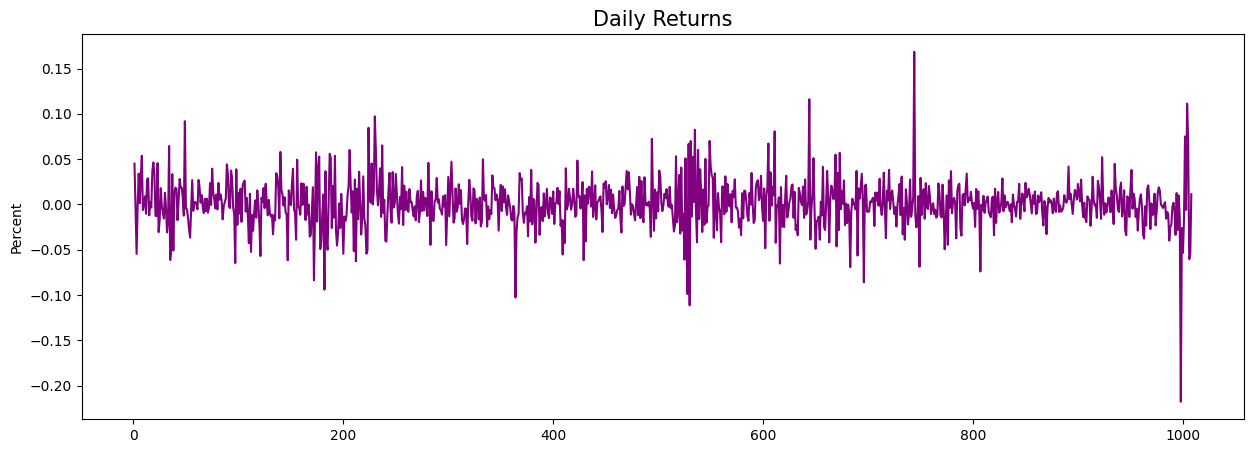

In [61]:
# Daily Returns
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(15,5))
plt.plot(df['Daily Return'], color="purple")
plt.title('Daily Returns', fontsize=15)
plt.ylabel('Percent')
plt.show()

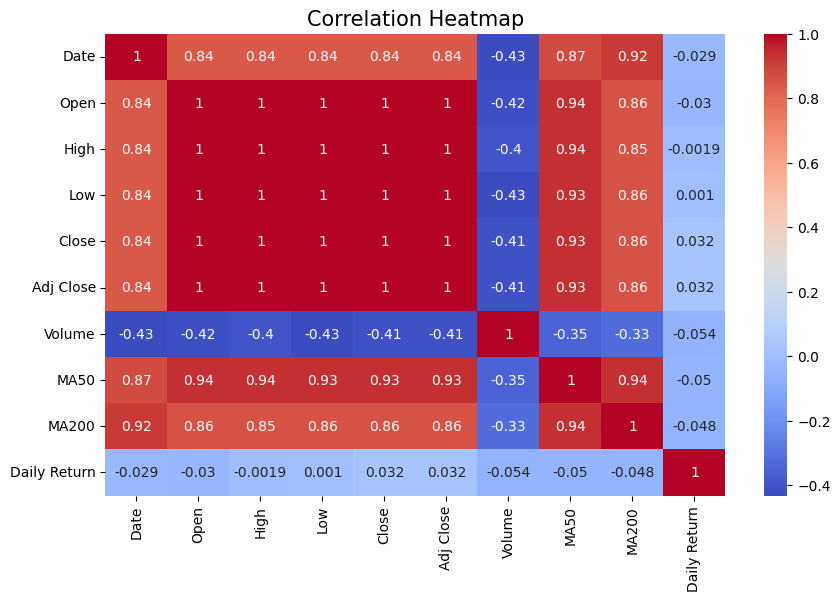

In [62]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

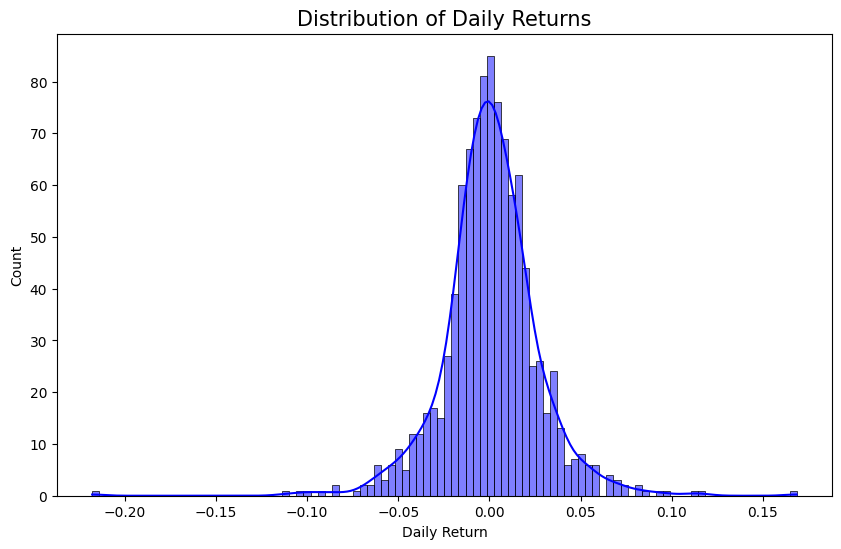

In [63]:
# Distribution of Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='blue')
plt.title('Distribution of Daily Returns', fontsize=15)
plt.show()

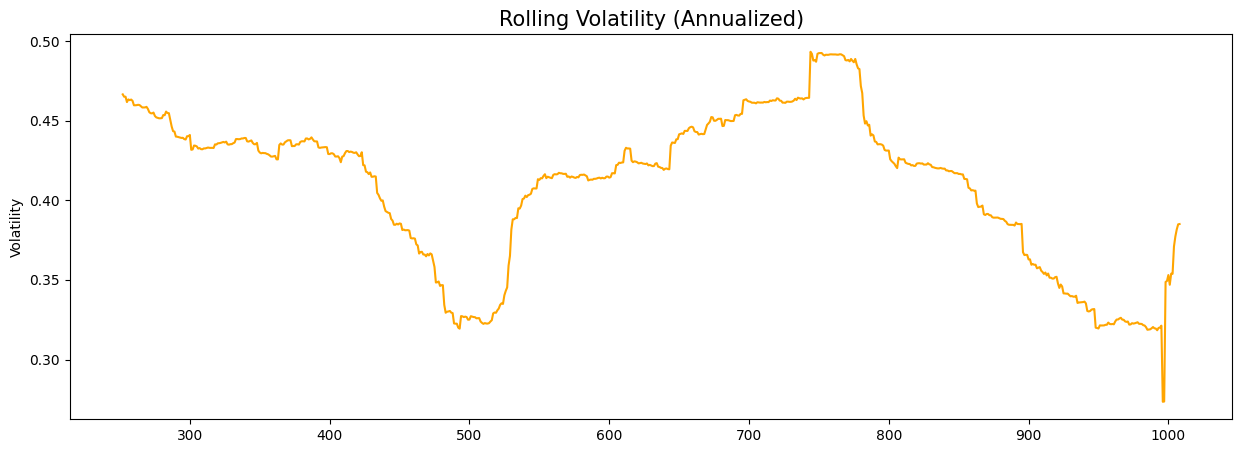

In [64]:
# Volatility
df['Volatility'] = df['Daily Return'].rolling(window=252).std() * np.sqrt(252)

plt.figure(figsize=(15,5))
plt.plot(df['Volatility'], color="orange")
plt.title('Rolling Volatility (Annualized)', fontsize=15)
plt.ylabel('Volatility')
plt.show()

In [65]:

# Splitting the data into training and testing sets

df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])             #70% used as a training data
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])   #30% used as a testing data

print(df_train.shape)
print(df_test.shape)

(706, 1)
(303, 1)


In [66]:
# Checking the output of training & testing sets
df_train.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [67]:
df_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [68]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

In [69]:
df_train_array = scaler.fit_transform(df_train)
df_train_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [70]:
# Chekcking the shape of scaled array
df_train_array.shape

(706, 1)

In [71]:
# Preparing the training data
X_train = []
y_train = []

for i in range(100,df_train_array.shape[0]):
    X_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

if not isinstance(X_train, np.ndarray):
    X_train = np.array(X_train)

if np.isnan(X_train).any() or np.isinf(X_train).any():
    raise ValueError("X_train contains NaN or Inf values")

if X_train.ndim == 2:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compiling & fitting the model 

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(X_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )

Epoch 1/50
19/19 - 9s - 493ms/step - loss: 0.1146
Epoch 2/50
19/19 - 3s - 155ms/step - loss: 0.0296
Epoch 3/50
19/19 - 3s - 152ms/step - loss: 0.0177
Epoch 4/50
19/19 - 3s - 157ms/step - loss: 0.0160
Epoch 5/50
19/19 - 3s - 156ms/step - loss: 0.0143
Epoch 6/50
19/19 - 3s - 159ms/step - loss: 0.0144
Epoch 7/50
19/19 - 3s - 154ms/step - loss: 0.0124
Epoch 8/50
19/19 - 3s - 156ms/step - loss: 0.0125
Epoch 9/50
19/19 - 3s - 158ms/step - loss: 0.0124
Epoch 10/50
19/19 - 3s - 155ms/step - loss: 0.0114
Epoch 11/50
19/19 - 3s - 155ms/step - loss: 0.0135
Epoch 12/50
19/19 - 3s - 158ms/step - loss: 0.0111
Epoch 13/50
19/19 - 3s - 161ms/step - loss: 0.0111
Epoch 14/50
19/19 - 3s - 153ms/step - loss: 0.0102
Epoch 15/50
19/19 - 3s - 164ms/step - loss: 0.0111
Epoch 16/50
19/19 - 3s - 156ms/step - loss: 0.0105
Epoch 17/50
19/19 - 3s - 158ms/step - loss: 0.0099
Epoch 18/50
19/19 - 3s - 145ms/step - loss: 0.0096
Epoch 19/50
19/19 - 3s - 153ms/step - loss: 0.0111
Epoch 20/50
19/19 - 3s - 154ms/step - lo

In [74]:
df_test.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [75]:
df_train.tail()

,Close
701,479.100006
702,480.630005
703,481.790009
704,484.670013
705,488.239990


In [76]:
# Append testing & training data
past_100_days = df_train.tail(100)

In [79]:
#final_df = past_100_days.append(df_test, ignore_index=True)
final_df = pd.concat([past_100_days, df_test], ignore_index=True)

In [80]:
# Scaling the data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [81]:
# Checking shape of the input_data
input_data.shape

(403, 1)

In [82]:
# Preparing the testing data
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
X_test,y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [83]:
# Making Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step
(303, 1)


In [84]:
# Checking y_test
y_test

array([0.35217924, 0.37103526, 0.37742098, 0.39657814, 0.39459021,
       0.43639862, 0.43278411, 0.41513293, 0.41751255, 0.47013471,
       0.46073667, 0.4033254 , 0.42588629, 0.43230216, 0.49013517,
       0.48218326, 0.49739453, 0.52170251, 0.52637129, 0.50968392,
       0.50492488, 0.46621878, 0.46468256, 0.48019515, 0.51558778,
       0.49667165, 0.54528743, 0.49146052, 0.48525552, 0.42407899,
       0.44938103, 0.45392929, 0.41989216, 0.40528327, 0.44606766,
       0.42519346, 0.41651858, 0.42793452, 0.68267123, 0.66309233,
       0.61890412, 0.59363241, 0.60914481, 0.49272575, 0.53887156,
       0.52016629, 0.54019691, 0.5676676 , 0.54143199, 0.57971616,
       0.57558954, 0.56694472, 0.60053014, 0.61414507, 0.59607223,
       0.59284922, 0.59513848, 0.57724637, 0.56784832, 0.54375121,
       0.52435321, 0.56161335, 0.58348133, 0.56326999, 0.5396246 ,
       0.57513783, 0.56664358, 0.48495438, 0.45661014, 0.47197207,
       0.40251206, 0.44200125, 0.43627821, 0.49206299, 0.47688

In [85]:
# Checking y_pred
y_pred

array([[0.375395  ],
       [0.37825167],
       [0.3804028 ],
       [0.3820417 ],
       [0.38359606],
       [0.38544142],
       [0.38827878],
       [0.3926298 ],
       [0.39840466],
       [0.40513045],
       [0.4127769 ],
       [0.42112762],
       [0.42895103],
       [0.43521893],
       [0.43928492],
       [0.44152468],
       [0.4424894 ],
       [0.44286102],
       [0.44346738],
       [0.44495106],
       [0.44740373],
       [0.45053905],
       [0.45342815],
       [0.45514596],
       [0.45525336],
       [0.45408577],
       [0.45197272],
       [0.44982845],
       [0.44783878],
       [0.4458635 ],
       [0.4429778 ],
       [0.43868226],
       [0.43288225],
       [0.42540592],
       [0.41622978],
       [0.4059537 ],
       [0.39522296],
       [0.3846262 ],
       [0.37480468],
       [0.3686954 ],
       [0.36935487],
       [0.37844217],
       [0.395401  ],
       [0.4183619 ],
       [0.4438014 ],
       [0.46881694],
       [0.49101317],
       [0.508

In [86]:
# Scaling the data
scaler.scale_

array([0.00301214])

In [88]:
scale_factor = 1/0.00301214
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

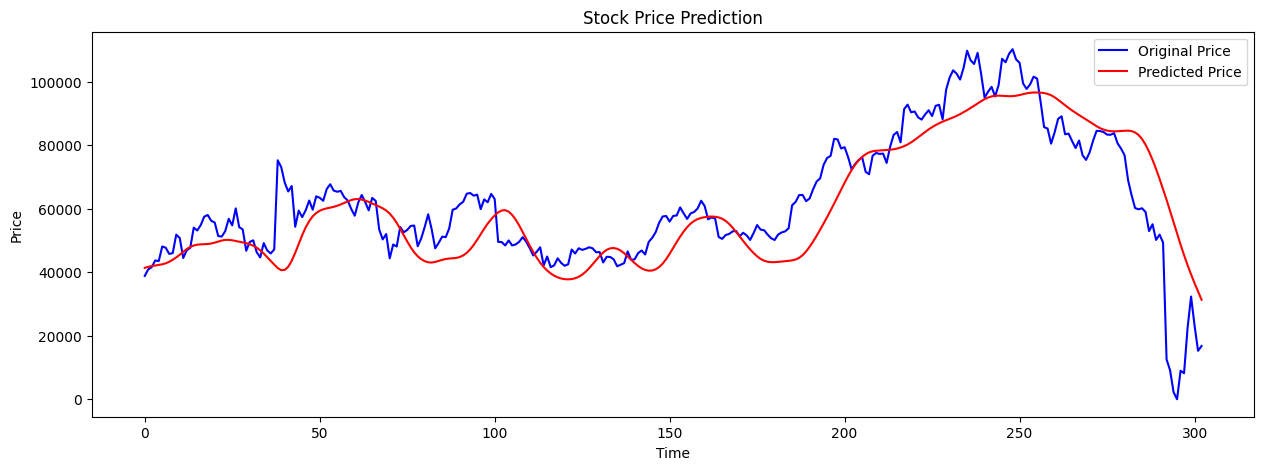

In [89]:
# Plotting graph for the result
plt.figure(figsize = (15,5))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Hyperparameter Tuning Using Grid Search
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'model__units': [50, 60, 80],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters found: {grid_result.best_params_}")


In [ ]:
#Cross-Validation
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Ensure X_train and y_train are defined
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tscv = TimeSeriesSplit(n_splits=5)
model = KerasRegressor(model=create_model, units=50, dropout_rate=0.2, epochs=50, batch_size=32, verbose=1)
try:
    results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    print(f"Cross-validation results: {results.mean()} ± {results.std()}")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
import shap

# Create a deep explainer object
explainer = shap.DeepExplainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()


In [ ]:
# Assuming you have a history object from model fitting
history = model.fit(...)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
